## Name: Nate Walker
### Date: 4/9/2020

 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

##  Set the File Paths for each of the Data Sets (csv's)

In [3]:
# Set the file paths
aapl_data = Path("C:/FinTech/aapl_historical.csv")
algo_data = Path("C:/FinTech/algo_returns.csv")
cost_data = Path("C:/FinTech/cost_historical.csv")
goog_data = Path("C:/FinTech/goog_historical.csv")
sp500_data = Path("C:/FinTech/sp500_history.csv")
whale_data = Path("C:/FinTech/whale_returns.csv")

## Read in the Data Sets as a DataFrame

In [4]:
# Read the CSVs and set the `date` column as a datetime index to the DataFrame

aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
################## Print the First 5 Rows of Each DataFrame ########################################
## Print the top 5 rows to check the dataframe
#aapl_df.head()
#algo_df.head()
#cost_df.head()
#goog_df.head()
#sp500_df.head()
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
#whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_data = Path("C:/FinTech/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()    # Truth tabel of true/false and sum counts the number of empty rows

#whale_df.shape  # size of the whale data frame matirx
#whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum()       # Check to confirm that empty rows were dropeped with counts.

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
#algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_data = Path("C:/FinTech/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()          # Check the first 5 rows of the dataframe

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()    # Truth tabel of true/false and sum counts the number of empty rows

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isnull().sum()       # Check to confirm that empty rows were dropeped with counts.

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices, sorting index
#sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_data = Path("C:/FinTech/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes            # Check the data type for the sp500 dataframe
sp500_df.isnull().sum()    # Truth tabel of true/false and sum counts the number of empty rows

Close    0
dtype: int64

In [21]:
# Fix Data Types
# YOUR CODE HERE
### Clean the data by removing the "$" in the close coumn
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df['Close']
print(sp500_df.dtypes)

# Convert the close price from "object" to "float"
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close']

Close    object
dtype: object


Date
2019-04-23    2933.68
2019-04-22    2907.97
2019-04-18    2905.03
2019-04-17    2900.45
2019-04-16    2907.06
2019-04-15    2905.58
2019-04-12    2907.41
2019-04-11    2888.32
2019-04-10    2888.21
2019-04-09    2878.20
2019-04-08    2895.77
2019-04-05    2892.74
2019-04-04    2879.39
2019-04-03    2873.40
2019-04-02    2867.24
2019-04-01    2867.19
2019-03-29    2834.40
2019-03-28    2815.44
2019-03-27    2805.37
2019-03-26    2818.46
2019-03-25    2798.36
2019-03-22    2800.71
2019-03-21    2854.88
2019-03-20    2824.23
2019-03-19    2832.57
2019-03-18    2832.94
2019-03-15    2822.48
2019-03-14    2808.48
2019-03-13    2810.92
2019-03-12    2791.52
               ...   
2012-11-13    1374.53
2012-11-12    1380.03
2012-11-09    1379.85
2012-11-08    1377.51
2012-11-07    1394.53
2012-11-06    1428.39
2012-11-05    1417.26
2012-11-02    1414.20
2012-11-01    1427.59
2012-10-31    1412.16
2012-10-26    1411.94
2012-10-25    1412.97
2012-10-24    1408.75
2012-10-23    1413.11
2012-

In [22]:
# Calculate Daily Returns
# YOUR CODE HERE
# Use the `pct_change` function to calculate daily returns
daily_returns_whale = whale_df.pct_change()
daily_returns_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840


In [23]:
# Count of Empty Cells (Nulls)
daily_returns_whale.isnull().sum()    # Truth tabel of true/false and sum counts the number of empty rows

# Drop nulls
# YOUR CODE HERE
daily_returns_whale.dropna(inplace=True)

# Check for dropped nulls
daily_returns_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [70]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

combined_df.head()                     # print the first 5 rows
#combined_df.sample(20)                # random sample of 20 rows
#combined_df.tail(10)                  # ck the last 10 rows of the dataframe lookg for nan's

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639,2878.20
2019-04-10,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632,2888.21
2019-04-11,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568,2888.32
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,2907.41
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,2905.58
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,2907.06
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,2900.45
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,2905.03
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,2907.97


## Check the Combined Dataframe for empty records

In [25]:
# Check the Combined Dataframe for empty records
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
Close                          0
dtype: int64

In [83]:
# Rename Column
# YOUR CODE HERE
# Set column names
combined_df.columns = ['SOROS', 'PAULSON', 'TIGER', 'BHI', 'ALGO_1', 'ALGO_2', 'SP500']

# Display a few rows
combined_df.head()

,SOROS,PAULSON,TIGER,BHI,ALGO_1,ALGO_2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

## Caculate Daily Returns of the Combined dataframe

In [84]:
# Use the `pct_change` function to calculate daily returns
daily_returns_all = combined_df.pct_change()
daily_returns_all.head()

,SOROS,PAULSON,TIGER,BHI,ALGO_1,ALGO_2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


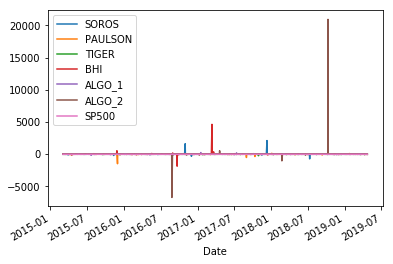

In [85]:
# Plot daily returns
# YOUR CODE HERE
daily_returns_all.plot()

## Calculate the Cumulative Returns

In [86]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# SOROS, PAULSON, TIGER, BHI, ALGO_1, ALGO_2,SP500
weights = [0.05, 0.1, 0.15, 0.20, 0.30, 0.40, 0.50]
portfolio_returns = daily_returns_all.dot(weights)
portfolio_returns.head()

Date
2015-03-03         NaN
2015-03-04   -0.407800
2015-03-05   -0.054621
2015-03-06   -1.826284
2015-03-09   -1.113851
dtype: float64

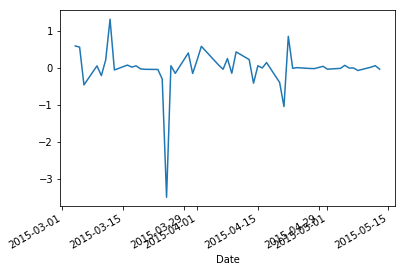

In [87]:
# Plot cumulative returns
# YOUR CODE HERE
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()
###########################
cumulative_returns.plot()

## Cumulative Returns with an Inital Investment = $10,000

---

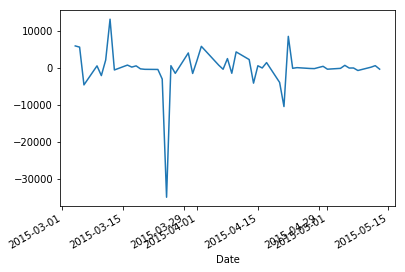

In [88]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

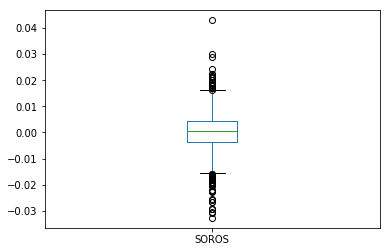

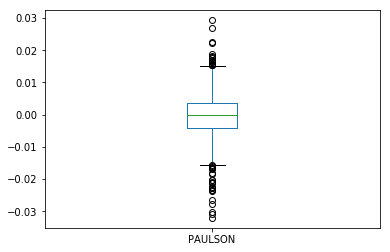

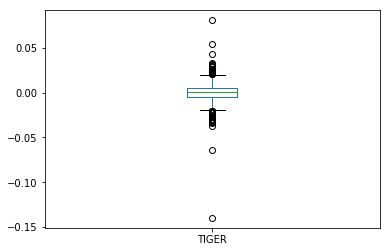

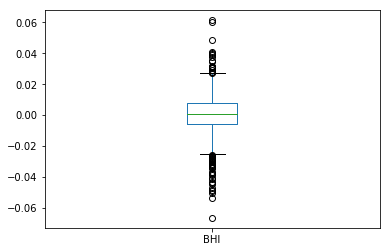

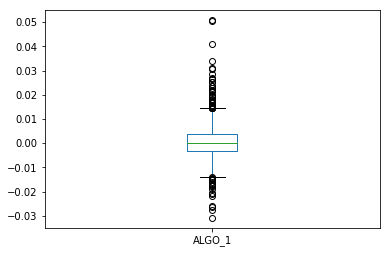

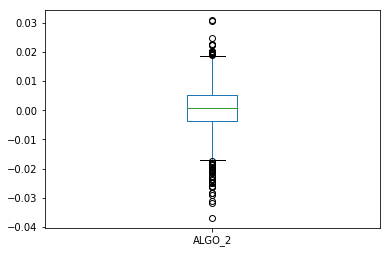

In [129]:
# Box plot to visually show risk
# YOUR CODE HERE 
combined_df.plot(kind='box', x='SP500', y='SOROS')
combined_df.plot(kind='box', x='SP500', y='PAULSON')
combined_df.plot(kind='box', x='SP500', y='TIGER')
combined_df.plot(kind='box', x='SP500', y='BHI')
combined_df.plot(kind='box', x='SP500', y='ALGO_1')
combined_df.plot(kind='box', x='SP500', y='ALGO_2')
######################################################
# Plot the Relationship between two variables,scatter plot
#daily_returns_all.plot(kind='scatter', x='SOROS', y='SP500')
#daily_returns_all.plot(kind='box', x='SP500', y='SOROS')


In [89]:
# Use the `pct_change` function to calculate daily returns
daily_returns_all = combined_df.pct_change()  # pct of the daily returns for the compbined dataframe
daily_returns_all.head()                      # print of the first 5 rows
#daily_returns_all.isnull().sum()              # count of empty records
#daily_returns_all.dropna(inplace=True)        # drop all empty records
#daily_returns_all.head()                      # print of the first 5 rows
#daily_returns_all.isnull().sum()              # ck for empty records in the combined dataframe

,SOROS,PAULSON,TIGER,BHI,ALGO_1,ALGO_2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.004389
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.001196
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.014174
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.003944


In [90]:
# Daily Standard Deviations - Whale Portfolio:
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
# The Whale Portfolio:
volatility = whale_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.110754
SOROS FUND MANAGEMENT LLC      0.124487
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [92]:
# Daily Standard Deviations - ALGO - Portfolio:
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
# The Algorithim Portfolio:
volatility = algo_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [100]:
# Daily Standard Deviations - Combined Portfolio, Daily Returns Portfolio:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
# The Combined Portfolio:
volatility = daily_returns_all.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility
#volatility.tail()
#volatility.sample(7)

SP500          0.135830
ALGO_1       249.404199
ALGO_2     10829.346406
SOROS               NaN
PAULSON             NaN
TIGER               NaN
BHI                 NaN
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

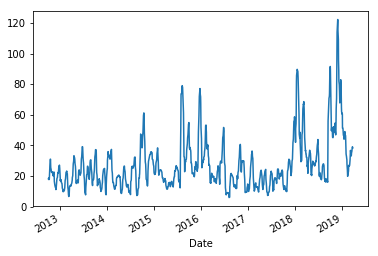

In [46]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
# Plot a rolling 21-day std dev of S&P 500 closing prices
sp500_df['Close'].rolling(window=21).std().plot()   # standard deviation of the Closing Price
#######################################
#sp500_df['Close'].rolling(window=21).mean().plot()   # Mean Closing Price is increasing

In [115]:
# Correlation
# YOUR CODE HERE
correlation = combined_df.corr()
correlation


,SOROS,PAULSON,TIGER,BHI,ALGO_1,ALGO_2,SP500
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.033918
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.036711
TIGER,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.047823
BHI,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.041547
ALGO_1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.012608
ALGO_2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.036267
SP500,0.033918,0.036711,-0.047823,0.041547,-0.012608,0.036267,1.000000


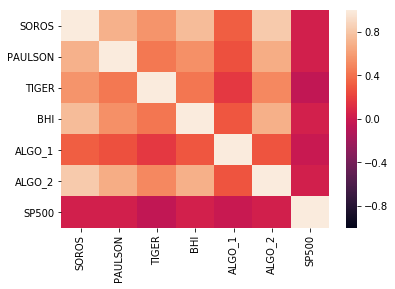

In [141]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

In [94]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
# Part One - Caculate the Covariance of single portfolio compared to the total market (S&P 500):
# Calculate covariance of all daily returns of combined portfolio stocks vs. S&P 500
SOROS_covariance = daily_returns_all['SOROS'].cov(daily_returns_all['SP500'])
PAULSON_covariance = daily_returns_all['PAULSON'].cov(daily_returns_all['SP500'])
TIGER_covariance = daily_returns_all['TIGER'].cov(daily_returns_all['SP500'])
BHI_covariance = daily_returns_all['BHI'].cov(daily_returns_all['SP500'])
ALGO_1_covariance = daily_returns_all['ALGO_1'].cov(daily_returns_all['SP500'])
ALGO_2_covariance = daily_returns_all['ALGO_2'].cov(daily_returns_all['SP500'])
ALGO_2_covariance

-0.6691221874317547

In [95]:
# Part Two: Calculate the Variance of the S&P 500:
# Calculate variance of all daily returns of daily returns vs. S&P 500
variance = daily_returns_all['SP500'].var()
variance

7.321363613824293e-05

## Calculate the Beta for a Single Portfolio vs the S&P 500

In [96]:
# Calculate beta of all daily returns of Portfolio stocks
ALGO_1_beta = ALGO_1_covariance / variance
ALGO_2_beta = ALGO_2_covariance / variance
BHI_beta = BHI_covariance / variance

print(f"ALGO_1: {ALGO_1_beta} | ALGO_2: {ALGO_2_beta} | BHI: {BHI_beta}")

ALGO_1: 1.7098814915180172 | ALGO_2: -9139.310963442787 | BHI: nan


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

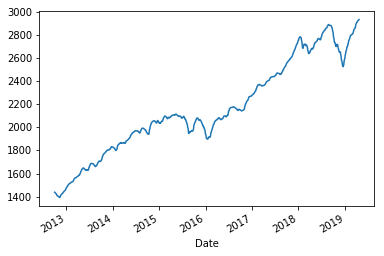

In [134]:
# (OPTIONAL) YOUR CODE HERE
sp500_df['Close'].ewm(span=21,adjust=False).mean().plot()  

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [143]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (correlation.mean() * 252) / correlation.std() * np.sqrt(252)
sharpe_ratios

SOROS      7316.554696
PAULSON    6663.802340
TIGER      5298.258949
BHI        6754.957995
ALGO_1     4194.069327
ALGO_2     7018.239223
SP500      1662.889200
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

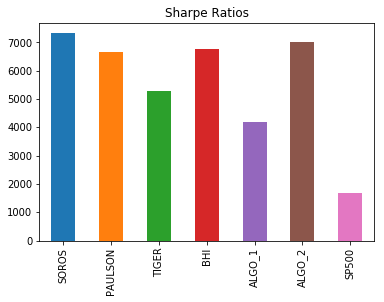

In [145]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
# Bar Plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Read the first stock
# YOUR CODE HERE

In [ ]:
# Read the second stock
# YOUR CODE HERE

In [ ]:
# Read the third stock
# YOUR CODE HERE

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [ ]:
# Reset the index
# YOUR CODE HERE

In [ ]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# YOUR CODE HERE

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE

In [ ]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [ ]:
# YOUR CODE HERE